<p align="center">
    <img src="https://github.com/YoungsukHan/Hyundai_equip/assets/44924554/076ffad6-abf4-431b-af15-10373ba06182" align="center">
</p>

# <b>[ML] CNC 머신 시계열 데이터 실습 

**제목:** CNC 머신 시계열 데이터 기반 상태 분류 모형 개발<br>
**Description:** 위치, 속도, 가속도, 전압, 전류 등 최적 조건 분석을 위한 CNC 머신 데이터를 분석하여 머신러닝 기반 상태 분류 모형 개발

- DT, RF, SVM, Logistic Ridge

https://www.kamp-ai.kr/aidataDetail?AI_SEARCH=&page=1&DATASET_SEQ=3

**수집장치**

<img src="https://www.kamp-ai.kr/mnt/dataset/3/images/1.bmp">

|데이터 변수 종류|개수|
|:---:|:---:|
|샘플 관련 변수|6개|
|기계의 X축 관련 변수|11개|
|기계의 Y축 관련 변수|11개|
|기계의 Z축 관련 변수|11개|
|기계의 스핀들 관련 변수|12개|
|기타 변수|4개|

In [1]:
import time
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import *
from imblearn.under_sampling import *

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
# temp = pd.read_csv('dataset/CNC 비식별화 원본데이터_1209/CNC Virtual Data set _v2/experiment_01.csv', nrows=1, encoding='cp949')
# cols = temp.columns

In [3]:
cols = ['X_ActualPosition', 'X_ActualVelocity', 'X_ActualAcceleration', 'X_SetPosition', 'X_SetVelocity', 'X_SetAcceleration',
       'X_CurrentFeedback', 'X_DCBusVoltage', 'X_OutputCurrent', 'X_OutputVoltage', 'X_OutputPower', 'Y_ActualPosition',
       'Y_ActualVelocity', 'Y_ActualAcceleration', 'Y_SetPosition', 'Y_SetVelocity', 'Y_SetAcceleration', 'Y_CurrentFeedback',
       'Y_DCBusVoltage', 'Y_OutputCurrent', 'Y_OutputVoltage', 'Y_OutputPower', 'Z_ActualPosition', 'Z_ActualVelocity', 'Z_ActualAcceleration',
       'Z_SetPosition', 'Z_SetVelocity', 'Z_SetAcceleration', 'Z_CurrentFeedback', 'Z_DCBusVoltage', 'Z_OutputCurrent',
       'Z_OutputVoltage', 'S_ActualPosition', 'S_ActualVelocity', 'S_ActualAcceleration', 'S_SetPosition', 'S_SetVelocity',
       'S_SetAcceleration', 'S_CurrentFeedback', 'S_DCBusVoltage', 'S_OutputCurrent', 'S_OutputVoltage', 'S_OutputPower',
       'S_SystemInertia', 'M_CURRENT_PROGRAM_NUMBER', 'M_sequence_number', 'M_CURRENT_FEEDRATE', 'Machining_Process']

In [4]:
# 데이터셋 불러오기
X_train = pd.read_csv('dataset/CNC 학습통합데이터_1209/X_train.csv', encoding='cp949', names=cols)
y_train = pd.read_csv('dataset/CNC 학습통합데이터_1209/y_train.csv', encoding='cp949', names=['OK', 'TAG'])

X_test = pd.read_csv('dataset/CNC 학습통합데이터_1209/X_test.csv', encoding='cp949', names=cols)
y_test = pd.read_csv('dataset/CNC 학습통합데이터_1209/y_test.csv', encoding='cp949', names=['OK', 'TAG'])

In [5]:
X_train.head()

,X_ActualPosition,X_ActualVelocity,X_ActualAcceleration,X_SetPosition,X_SetVelocity,X_SetAcceleration,X_CurrentFeedback,X_DCBusVoltage,X_OutputCurrent,X_OutputVoltage,...,S_CurrentFeedback,S_DCBusVoltage,S_OutputCurrent,S_OutputVoltage,S_OutputPower,S_SystemInertia,M_CURRENT_PROGRAM_NUMBER,M_sequence_number,M_CURRENT_FEEDRATE,Machining_Process
0,202.0,4.0,4.00,202.0,4.0,4.000000,0.18,0.0207,329,2.77,...,0.524,2.740000e-19,329,0.0,6.960000e-07,16.0,1,0,50,8
1,202.0,-6.8,-346.00,202.0,-9.6,-354.000000,-10.90,0.1860,328,23.30,...,-0.288,2.740000e-19,328,0.0,-5.270000e-07,16.0,1,4,50,0
2,200.0,-13.8,-2.25,200.0,-13.9,3.999905,-8.59,0.1400,328,30.60,...,0.524,2.740000e-19,328,0.0,9.100000e-07,16.0,1,7,50,0
3,198.0,-14.0,4.00,198.0,-13.9,3.999905,-6.11,0.1300,327,30.30,...,-0.180,2.740000e-19,328,0.0,1.070000e-06,16.0,1,7,50,0
4,197.0,-13.9,-14.80,196.0,-13.9,4.000095,-5.70,0.1140,328,30.50,...,0.226,2.740000e-19,328,0.0,1.960000e-06,16.0,1,7,50,0


In [6]:
X_train.shape

(18806, 48)

In [7]:
y_train.head()

,OK,TAG
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [8]:
y_train.drop(columns=['OK'], axis=1, inplace=True)
y_test.drop(columns=['OK'], axis=1, inplace=True)

In [9]:
y_train['TAG'].value_counts() # 0 : 양품, 1 : 불량품

TAG
0.0    9403
1.0    9403
Name: count, dtype: int64

In [10]:
y_test['TAG'].value_counts() # 0 : 양품, 1 : 불량품

TAG
0.0    13242
Name: count, dtype: int64

(주의) 테스트셋에는 양품만 존재하여 트레이닝셋과 테스트셋을 병합 후, 각각 양품/불량품 모두 존재하게 다시 분할

In [11]:
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

df = pd.concat([train, test], axis=0)
df = df.reset_index(drop=True)

In [12]:
X_train.describe()

,X_ActualPosition,X_ActualVelocity,X_ActualAcceleration,X_SetPosition,X_SetVelocity,X_SetAcceleration,X_CurrentFeedback,X_DCBusVoltage,X_OutputCurrent,X_OutputVoltage,...,S_CurrentFeedback,S_DCBusVoltage,S_OutputCurrent,S_OutputVoltage,S_OutputPower,S_SystemInertia,M_CURRENT_PROGRAM_NUMBER,M_sequence_number,M_CURRENT_FEEDRATE,Machining_Process
count,18806.000000,18806.000000,18806.000000,18806.000000,18806.000000,18806.000000,18806.000000,1.880600e+04,18806.000000,18806.000000,...,18806.000000,1.880600e+04,18806.000000,18806.000000,18806.000000,18806.000000,18806.000000,18806.000000,18806.000000,18806.000000
mean,167.707168,3.652443,4.611939,167.705280,3.661146,4.593118,-0.528772,5.912743e-02,326.657662,8.159660,...,12.335379,5.461668e-01,323.379241,68.114896,0.103512,16.004945,1.009252,37.200255,23.368659,3.954748
std,20.820486,6.525964,102.797174,20.822356,6.537311,86.564245,4.149693,4.494101e-02,1.662001,9.960586,...,11.450005,4.899729e-01,4.847668,58.373242,0.090861,0.857813,0.572358,43.000020,20.621855,2.616196
min,144.000000,-17.300000,-1275.000000,144.000000,-17.000000,-997.000000,-23.400000,2.780000e-19,320.000000,0.000000,...,-8.280000,0.000000e+00,290.000000,0.000000,-0.002960,15.000000,0.000000,0.000000,3.000000,0.000000
25%,150.500000,2.392500,-20.000000,150.125000,2.391000,3.000000,-3.380000,2.210000e-02,325.000000,1.260000,...,0.207000,2.760000e-19,320.000000,0.000000,0.000000,15.000000,1.000000,0.000000,6.000000,1.000000
50%,161.000000,4.000000,4.000000,161.000000,4.000000,4.000000,-0.533000,5.390000e-02,327.000000,4.735000,...,16.900000,8.100000e-01,323.000000,116.000000,0.154000,16.000000,1.000000,19.000000,15.000000,4.000000
75%,182.000000,5.025000,28.000000,182.000000,5.000000,5.000000,1.660000,9.080000e-02,328.000000,10.800000,...,21.800000,9.480000e-01,327.000000,119.000000,0.182000,17.000000,1.000000,71.000000,50.000000,7.000000
max,203.000000,55.300000,1444.000000,203.000000,55.000000,1005.000000,27.100000,3.800000e-01,331.000000,75.400000,...,75.400000,3.160000e+00,332.000000,130.000000,0.569000,17.000000,4.000000,135.000000,50.000000,8.000000


In [13]:
# # https://seaborn.pydata.org/generated/seaborn.pairplot.html
# start_time = time.time()

# sns.pairplot(df, diag_kind='kde', hue='TAG', plot_kws=dict(marker="+", linewidth=1, alpha=0.1))
# plt.show()

# end_time = time.time()
# print(f"Execution time: {end_time - start_time} seconds")

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df[cols], df['TAG'], test_size=0.3, shuffle=True, random_state=0, stratify=df['TAG'])

In [15]:
y_train.value_counts(), y_test.value_counts()

(TAG
 0.0    15851
 1.0     6582
 Name: count, dtype: int64,
 TAG
 0.0    6794
 1.0    2821
 Name: count, dtype: int64)

### Decision Tree

In [16]:
dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : [3, 4],
}

In [17]:
dt_clf = DecisionTreeClassifier(random_state=0)

In [18]:
dt_grid = GridSearchCV(estimator=dt_clf, param_grid=dt_params, cv=5, scoring='f1', refit=True, verbose=1)

In [19]:
%%time
dt_grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
CPU times: total: 1.89 s
Wall time: 1.9 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [3, 4]},
             scoring='f1', verbose=1)

In [20]:
y_pred_dt = dt_grid.predict(X_test)

print(f"Precision: {precision_score(y_test, y_pred_dt):0.4f}")
print(f"Recall: {recall_score(y_test, y_pred_dt):0.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_dt):0.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):0.4f}")
print("-----------")
print(classification_report(y_test, y_pred_dt))

Precision: 0.7274
Recall: 0.7207
F1-Score: 0.7240
Accuracy: 0.8388
-----------
              precision    recall  f1-score   support

         0.0       0.88      0.89      0.89      6794
         1.0       0.73      0.72      0.72      2821

    accuracy                           0.84      9615
   macro avg       0.81      0.80      0.81      9615
weighted avg       0.84      0.84      0.84      9615



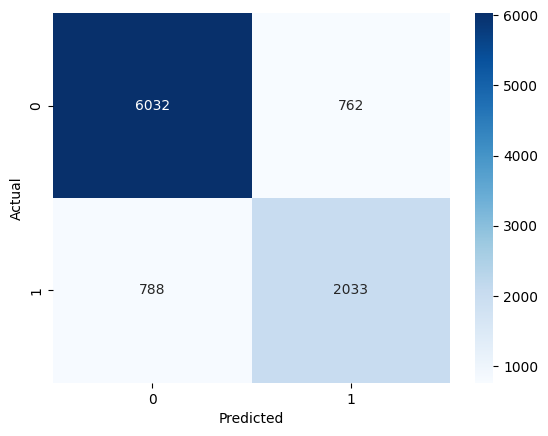

In [21]:
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Random Forest

In [22]:
rf_params = {
    'n_estimators': [50, 100],
    'max_depth' : [3, 4],
}

In [23]:
rf_clf = RandomForestClassifier(random_state=0)

In [24]:
rf_grid = GridSearchCV(estimator=rf_clf, param_grid=rf_params, scoring='f1', cv=5, refit=True, verbose=1)

In [25]:
%%time
rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
CPU times: total: 19.1 s
Wall time: 19.1 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 4], 'n_estimators': [50, 100]},
             scoring='f1', verbose=1)

In [26]:
rf_grid.best_params_

{'max_depth': 4, 'n_estimators': 100}

In [27]:
y_pred_rf = rf_grid.predict(X_test)

In [28]:
print(f"Precision: {precision_score(y_test, y_pred_rf):0.4f}") # 모델이 1로 예측한 데이터 중 실제 1인 데이터의 비율
print(f"Recall: {recall_score(y_test, y_pred_rf):0.4f}") # 실제 1인 데이터 중 모델이 1로 예측한 데이터의 비율
print(f"F1-Score: {f1_score(y_test, y_pred_rf):0.4f}") # 정밀도와 재현율의 조화평균
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):0.4f}")
print("-----------")
print(classification_report(y_test, y_pred_rf))

Precision: 0.8659
Recall: 0.9153
F1-Score: 0.8899
Accuracy: 0.9335
-----------
              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95      6794
         1.0       0.87      0.92      0.89      2821

    accuracy                           0.93      9615
   macro avg       0.91      0.93      0.92      9615
weighted avg       0.94      0.93      0.93      9615



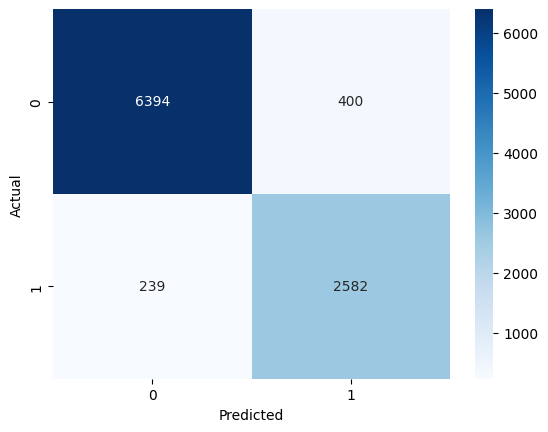

In [29]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Support Vector Machine(SVM)

In [30]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [31]:
svm_params = {
    'kernel':['rbf'] # poly, linear, sigmoid, precomupted
}

svm_clf = SVC(gamma='auto')
svm_grid = GridSearchCV(estimator=svm_clf, param_grid=svm_params, scoring='f1', cv=5, refit=True, verbose=1)
svm_grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=SVC(gamma='auto'), param_grid={'kernel': ['rbf']},
             scoring='f1', verbose=1)

In [32]:
y_pred_svm = svm_grid.predict(X_test_scaled)

print(f"Precision: {precision_score(y_test, y_pred_svm):0.4f}") # 모델이 1로 예측한 데이터 중 실제 1인 데이터의 비율
print(f"Recall: {recall_score(y_test, y_pred_svm):0.4f}") # 실제 1인 데이터 중 모델이 1로 예측한 데이터의 비율
print(f"F1-Score: {f1_score(y_test, y_pred_svm):0.4f}") # 정밀도와 재현율의 조화평균
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):0.4f}")
print("-----------")
print(classification_report(y_test, y_pred_svm))

Precision: 0.7859
Recall: 0.7845
F1-Score: 0.7852
Accuracy: 0.8741
-----------
              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91      6794
         1.0       0.79      0.78      0.79      2821

    accuracy                           0.87      9615
   macro avg       0.85      0.85      0.85      9615
weighted avg       0.87      0.87      0.87      9615



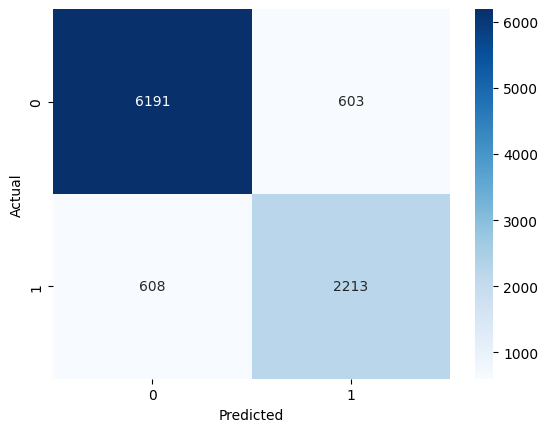

In [33]:
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [34]:
len(y_train) / (len(np.unique(y_train)) * np.bincount(y_train))

array([0.70762097, 1.70411729])

In [35]:
np.bincount(y_train)

array([15851,  6582], dtype=int64)

### Logistic Ridge

In [36]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html

from sklearn.linear_model import RidgeClassifier

# n_samples / (n_classes * np.bincount(y))
class_weight_ = len(y_train) / (len(np.unique(y_train)) * np.bincount(y_train))

lr_params = {
    'alpha': [1.0],
    'class_weight': [{0: class_weight_[0], 1: class_weight_[1]}]
}

In [37]:
from sklearn.linear_model import LogisticRegression

lr_clf = RidgeClassifier(random_state=0)

lr_grid = GridSearchCV(lr_clf, param_grid=lr_params, cv=5, scoring='f1', refit=True, verbose=1)
# 학습
lr_grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=RidgeClassifier(random_state=0),
             param_grid={'alpha': [1.0],
                         'class_weight': [{0: 0.7076209702857864,
                                           1: 1.704117289577636}]},
             scoring='f1', verbose=1)

In [38]:
y_pred_lr = lr_grid.predict(X_test_scaled)

In [39]:
print(f"Precision: {precision_score(y_test, y_pred_lr):0.4f}") # 모델이 1로 예측한 데이터 중 실제 1인 데이터의 비율
print(f"Recall: {recall_score(y_test, y_pred_lr):0.4f}") # 실제 1인 데이터 중 모델이 1로 예측한 데이터의 비율
print(f"F1-Score: {f1_score(y_test, y_pred_lr):0.4f}") # 정밀도와 재현율의 조화평균
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):0.4f}")
print("-----------")
print(classification_report(y_test, y_pred_lr))

Precision: 0.7729
Recall: 0.7841
F1-Score: 0.7785
Accuracy: 0.8691
-----------
              precision    recall  f1-score   support

         0.0       0.91      0.90      0.91      6794
         1.0       0.77      0.78      0.78      2821

    accuracy                           0.87      9615
   macro avg       0.84      0.84      0.84      9615
weighted avg       0.87      0.87      0.87      9615

